In [0]:
import math
import numpy as np
import os
import pandas as pd
from six import iteritems
from functools import reduce

# cluster
from sklearn import metrics
from sklearn.cluster import OPTICS, cluster_optics_dbscan,DBSCAN 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


%matplotlib inline
np.random.seed(9999)


In [0]:
df_for_cluster.head()

,alive_pct,purchase_pct
0,0.930328,0.921614
1,0.454918,0.375482
2,0.857923,0.827141
3,0.982240,0.974396
4,0.913934,0.884450


DBSCAN

In [0]:
def hyperparameterTuning(df):
  
  # input: dataframe contains only parameters for clustering purpose
  # output: min cluster, min sample, xi 
  # reference source: https://stackoverflow.com/questions/12893492/choosing-eps-and-minpts-for-dbscan-r

    X = len(df)
    count = 0
    
    while(X>0):
        X=X//10  # result is rounded to the next smallest whole number
        count=count+1
        min_cluster_size = int(round(X/pow(100,count)))
        min_samples      = int(round(np.log(X)))-1
        xi               = min_samples/(pow(10,count+1))

        return min_cluster_size,min_samples ,xi
    
def opticPlot(df_for_cluster,min_samples, xi, min_cluster_size):
  
    #create array
    X = df_for_cluster.values
    
    clust = OPTICS(min_samples=min_samples, xi=xi, min_cluster_size=min_cluster_size)
    
    # Run the fit
    clust.fit(X)
    
    # plot
    space = np.arange(len(X))
    reachability = clust.reachability_[clust.ordering_]
    labels = clust.labels_[clust.ordering_]

    plt.figure(figsize=(10, 7))
    G = gridspec.GridSpec(2, 3)
    ax1 = plt.subplot(G[0, :])

    # Reachability plot
    colors = ['g.', 'r.', 'b.', 'y.', 'c.']
    for klass, color in zip(range(0, 5), colors):
        Xk = space[labels == klass]
        Rk = reachability[labels == klass]
        ax1.plot(Xk, Rk, color, alpha=0.3)
    ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
    ax1.set_ylabel('Reachability (epsilon distance)')
    ax1.set_title('Reachability Plot')

    plt.tight_layout()
    return plt.show()

 

In [0]:
hyperparameterTuning(df)

Out[5]: (21, 7, 0.07)

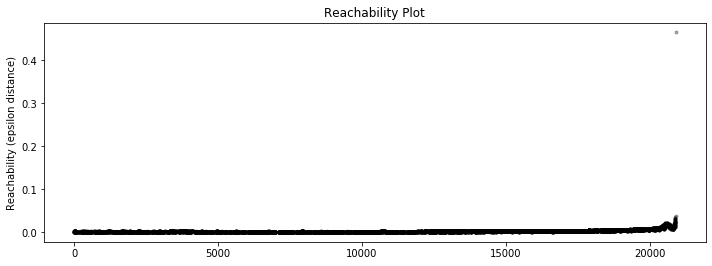

In [0]:
min_cluster_size= 21
min_samples=7
xi=0.07
opticPlot(df_for_cluster,min_samples, xi, min_cluster_size)